In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs

In [24]:
# 1. Generate two clusters (blobs)
X, _ = make_blobs(n_samples=600, centers=[[0, 0], [3, 3]], cluster_std=1.0, random_state=42)

# 2. Define logic to create the "concentric" classes
# We calculate the distance from the center of each blob
dist_from_center1 = np.linalg.norm(X - [0, 0], axis=1)
dist_from_center2 = np.linalg.norm(X - [3, 3], axis=1)

# Assign class 0 if it's "outside" the core of blob 1 OR "inside" the core of blob 2
# This mimics the yellow/purple swap seen in your image
y = np.zeros(600)

# Cluster 1 (Left): Outer is Purple (0), Inner is Yellow (1)
mask1 = dist_from_center1 < 1.2
y[(dist_from_center1 < 2.5)] = 0 # Background
y[mask1] = 1 

# Cluster 2 (Right): Outer is Purple (0), Inner is Yellow (1)
# Adjusting to match your plot where the top-right cluster has a yellow center
mask2 = dist_from_center2 < 1.2
y[dist_from_center2 < 2.5] = 1 # Background
y[mask2] = 0

# 3. Create DataFrame
df = pd.DataFrame(X, columns=['X', 'Y'])
df['class'] = y

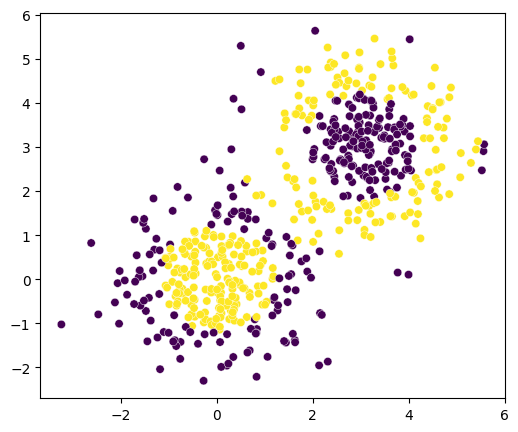

In [25]:
plt.figure(figsize=(6, 5))
plt.scatter(df['X'], df['Y'], c=df['class'], cmap='viridis', edgecolors='white', linewidth=0.3)
plt.show()

In [26]:
import tensorflow
from tensorflow import keras
from keras import Sequential, Input
from keras.layers import Dense, BatchNormalization

In [27]:
model= Sequential(
    [
        Input(shape=(2,)),
        Dense(3, activation='relu'),
        Dense(2, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history_1 = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5746 - loss: 0.7027 - val_accuracy: 0.5583 - val_loss: 0.6832
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5332 - loss: 0.7093 - val_accuracy: 0.5917 - val_loss: 0.6817
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6184 - loss: 0.6897 - val_accuracy: 0.6250 - val_loss: 0.6803
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6005 - loss: 0.6922 - val_accuracy: 0.6417 - val_loss: 0.6794
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6078 - loss: 0.7007 - val_accuracy: 0.6667 - val_loss: 0.6790
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6321 - loss: 0.6976 - val_accuracy: 0.6833 - val_loss: 0.6785
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6070 - loss: 0.6934 - val_accuracy: 0.6917 - val_loss: 0.6776
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5952 - loss: 0.6906 - val_accuracy: 0.6833 - v

In [30]:
model = Sequential(
    [
        Input(shape=(2,)),
        Dense(3, activation='relu'),
        BatchNormalization(),
        Dense(2, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ]
)
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history_2 = model.fit(X, y, epochs=100, validation_split=0.2)    

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4104 - loss: 0.9285 - val_accuracy: 0.5417 - val_loss: 0.6938
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4410 - loss: 0.9078 - val_accuracy: 0.5167 - val_loss: 0.6925
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4523 - loss: 0.8648 - val_accuracy: 0.5333 - val_loss: 0.6901
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4829 - loss: 0.8109 - val_accuracy: 0.5250 - val_loss: 0.6868
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5380 - loss: 0.7263 - val_accuracy: 0.5417 - val_loss: 0.6831
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5383 - loss: 0.7257 - val_accuracy: 0.5583 - val_loss: 0.6792
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5290 - loss: 0.7427 - val_accuracy: 0.5833 - val_loss: 0.6743
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5110 - loss: 0.7610 - val_accuracy: 0.5917 - v

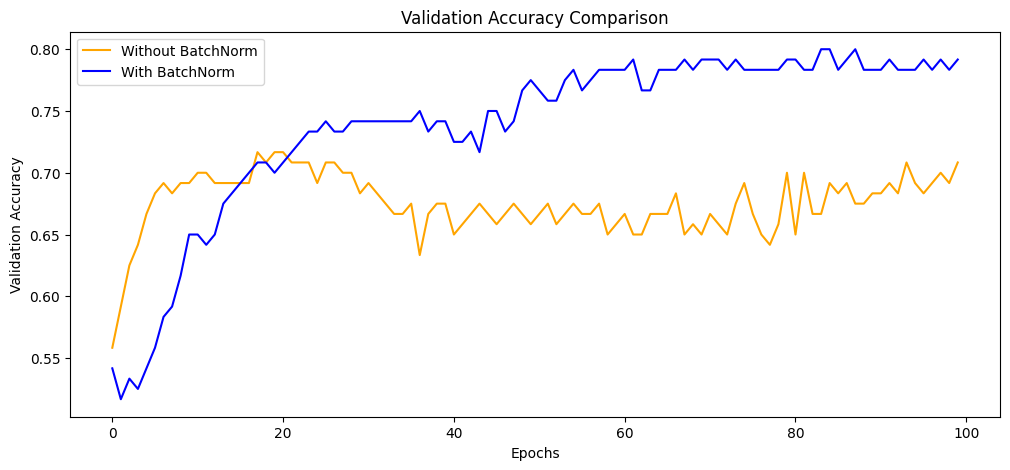

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(history_1.history['val_accuracy'], label='Without BatchNorm', color='orange')
plt.plot(history_2.history['val_accuracy'], label='With BatchNorm', color='blue')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

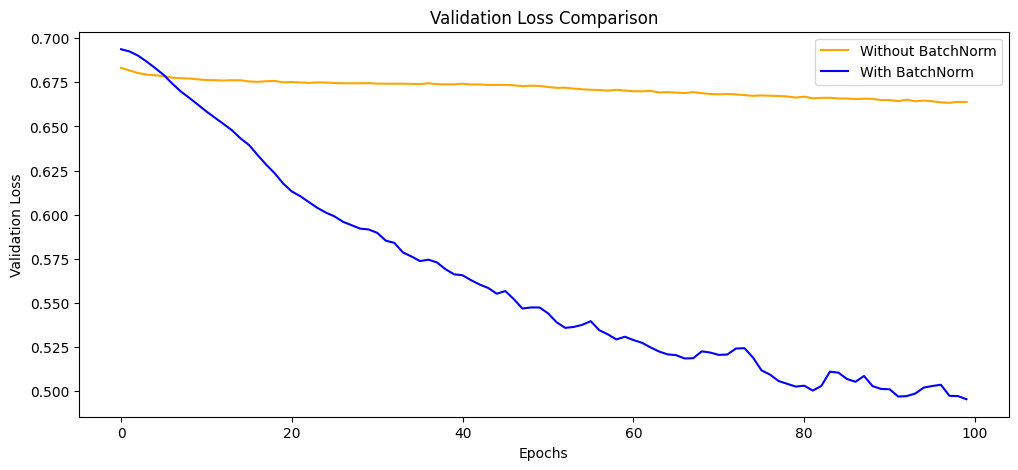

In [34]:
plt.figure(figsize=(12, 5))
plt.plot(history_1.history['val_loss'], label='Without BatchNorm', color='orange')
plt.plot(history_2.history['val_loss'], label='With BatchNorm', color='blue')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()